In [164]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.linalg as la
import h5py

In [165]:
dir = "../data"
data_files = os.listdir(dir)
convergence_data_files = [s for s in data_files if "convergence_" in s and "h5" in s]
convergence_h5_files = [h5py.File(dir + '/' + fn) for fn in convergence_data_files]

In [166]:
list(convergence_h5_files[0].keys())

['averaging_times',
 'bose_model',
 'init_population',
 'num_points',
 'num_samples',
 'population',
 'step_times',
 'time_steps',
 'total_walltime',
 'use_simd',
 'walltimes']

In [167]:
populations = [h5f["population"] for h5f in convergence_h5_files]

In [168]:
num_samples = np.array([h5f["num_samples"][0] for h5f in convergence_h5_files])
max_idx = np.argmax(num_samples)
min_idx = np.argmax(num_samples)

num_samples

array([ 5950, 90100, 60400, 30700, 65350, 45550, 95050, 80200, 35650,
       20800, 15850, 50500, 75250,  1000, 85150, 25750, 10900, 40600,
       55450, 70300], dtype=int32)

In [169]:
errors = np.array([la.norm(pop[()] - populations[max_idx][()]) / pop.size for pop in populations])
errors

array([1.25172054e-04, 4.33313363e-05, 5.78626098e-05, 6.65297441e-05,
       4.56050411e-05, 5.84459911e-05, 0.00000000e+00, 3.87665276e-05,
       5.88997256e-05, 8.03188646e-05, 7.04913335e-05, 5.56997434e-05,
       4.50269256e-05, 2.87476652e-04, 4.31498182e-05, 6.09196638e-05,
       9.11928616e-05, 5.36902013e-05, 5.16968426e-05, 4.13478042e-05])

In [170]:
boost = 7e-6
print(np.log10(num_samples))
print(np.log10(errors + boost))
linreg_result = linregress(np.log10(num_samples), np.log10(errors + boost))
print(linreg_result.slope)
print(linreg_result.intercept)
fit_x = np.linspace(np.min(num_samples), np.max(num_samples), num=50)
fit_y = 10.0 ** (linreg_result.intercept + np.log10(fit_x) * linreg_result.slope)

[3.77451697 4.95472479 4.78103694 4.48713838 4.81524559 4.65848838
 4.97795212 4.90417437 4.55205953 4.31806333 4.20002927 4.70329138
 4.8765065  3.         4.93018465 4.41077723 4.0374265  4.60852603
 4.74390155 4.84695533]
[-3.87886036 -4.29816154 -4.18800558 -4.13353695 -4.27897264 -4.18411695
 -5.15490196 -4.33945204 -4.18111639 -4.05889192 -4.11074687 -4.20273424
 -4.28377184 -3.53094913 -4.29973064 -4.16800447 -4.00792008 -4.21688142
 -4.23138526 -4.31562325]
-0.46535072957431683
-2.0955914809650444


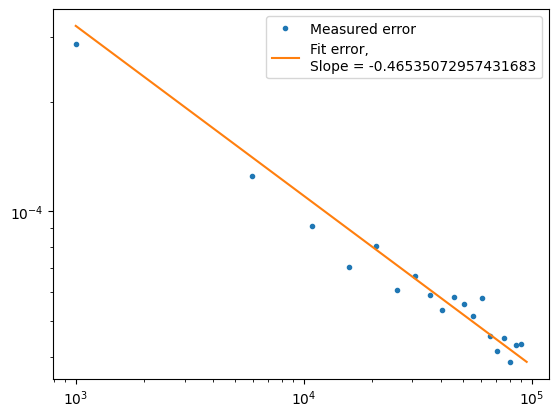

In [172]:
fig, ax = plt.subplots()
ax.set_yscale('log', base=10)
ax.set_xscale('log', base=10)
ax.plot(num_samples, errors, '.', label="Measured error")
ax.plot(fit_x, fit_y, '-', label="Fit error,\nSlope = {}".format(linreg_result.slope))
plt.legend()
plt.savefig("../plots/convergence.png")